# Group Final Report

Group: 22  
Name: Aparna Varma, Arthur Guo, Guozheng Gong, Norinne  
Course: STAT 301  
Date: **2025-04-XX**  

## Introduction

introduction...

## Methods and Results

### Data

In [1]:
library(tidyverse)
library(broom)
library(tidymodels)
library(glmnet)
library(mltools)
temp <- tempfile()
download.file("https://www.kaggle.com/api/v1/datasets/download/mrsimple07/restaurants-revenue-prediction", temp)
data <- read_csv(unz(temp, "Restaurant_revenue (1).csv"))
head(data)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ dials        1.3.0     ✔ rsample      1.2.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ recipes      1.1.0     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter

Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
61,43.11764,12.663793,Japanese,36.23613,0,45,350.9120
24,40.02008,4.577892,Italian,17.95256,0,36,221.3191
81,41.98149,4.652911,Japanese,22.60042,1,91,326.5298
70,43.00531,4.416053,Italian,18.98410,1,59,348.1906
30,17.45620,3.475052,Italian,12.76614,1,30,185.0091
92,19.42767,13.114473,American,43.09995,1,10,399.8675


This dataset contains information about restaurants, their customer activity, marketing efforts, and revenue. It is designed for exploratory data analysis (EDA) and predictive modeling, particularly for regression tasks. The dataset includes various restaurant characteristics, financial metrics, and customer interactions.

#### Dataset Summary
- Number of Observations: 1000
- Number of Variables: 8

#### Variable Description
| Variable Name               | Description                                                        | Type                      |
|----------------------------|--------------------------------------------------------------------|---------------------------|
| Number_of_Customers        | Number of customers visiting the restaurant.                       | Numeric (Discrete)        |
| Menu_Price                 | Average price of menu items.                                       | Numeric (Continuous)      |
| Marketing_Spend            | Amount spent on marketing activities.                              | Numeric (Continuous)      |
| Cuisine_Type               | Type of cuisine offered (e.g., Italian, Japanese).                 | Categorical               |
| Average_Customer_Spending  | Average amount spent by a customer per visit.                      | Numeric (Continuous)      |
| Promotions                 | Indicates whether a promotion was run (0 = No, 1 = Yes).           | Categorical (Binary)      |
| Reviews                    | Number of reviews received by the restaurant.                      | Numeric (Discrete)        |
| Monthly_Revenue            | Total revenue generated by the restaurant in a month.              | Numeric (Continuous)      |

Source: MrSimple07. (2024). Restaurants Revenue Prediction [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/7420974  
This section is copied from Norinne's individual assignment.

Nothing needs to be dropped because there is no meaningless variable like ID.

### Exploratory Data Analysis (EDA)

In [2]:
# Convert categorical features into factor data types.
# Code is based on Arthur's individual assignment.
work_data <- mutate(data, Cuisine_Type = as_factor(Cuisine_Type), Promotions = as_factor(Promotions))
head(work_data)

Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>
61,43.11764,12.663793,Japanese,36.23613,0,45,350.9120
24,40.02008,4.577892,Italian,17.95256,0,36,221.3191
81,41.98149,4.652911,Japanese,22.60042,1,91,326.5298
70,43.00531,4.416053,Italian,18.98410,1,59,348.1906
30,17.45620,3.475052,Italian,12.76614,1,30,185.0091
92,19.42767,13.114473,American,43.09995,1,10,399.8675


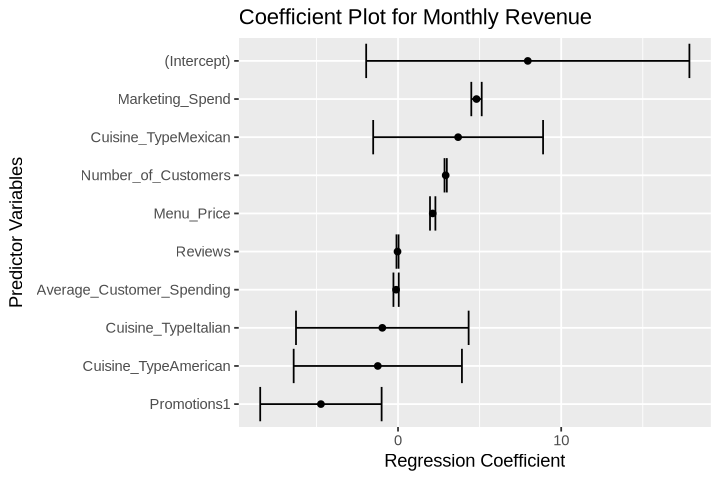

In [3]:
options(repr.plot.width = 6, repr.plot.height = 4)
model <- lm(Monthly_Revenue ~ ., data = work_data)
ggplot(tidy(model), aes(x = estimate, y = reorder(term, estimate))) +
  geom_point() +
  labs(x = "Regression Coefficient", y = "Predictor Variables", title = "Coefficient Plot for Monthly Revenue")+
  geom_errorbarh(aes(xmin = estimate - std.error, xmax = estimate + std.error))

This coefficient plot visualizes the estimated impact of each predictor on monthly revenue, along with the associated uncertainty, allowing for a clear assessment of which variables are most influential in the context of a multiple linear regression model.  
It looks like Marketing_Spend, Number_of_Customers, and Menu_Price may be associated with increasing monthly revenue.  
This section is copied from Guozheng's individual assignment.

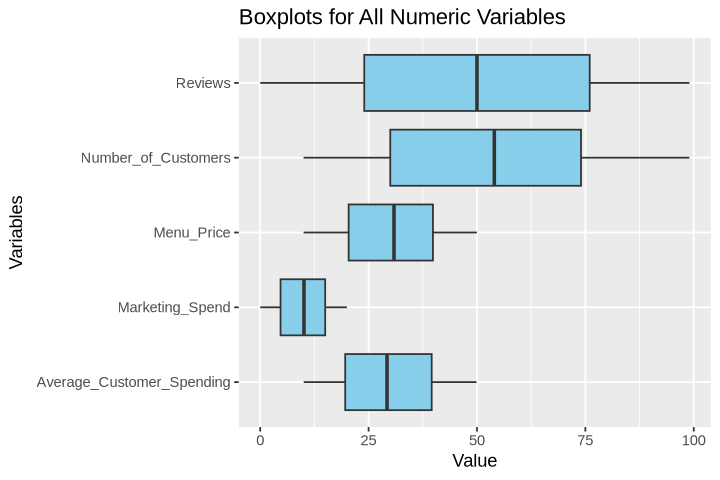

In [4]:
numeric_vars <- pivot_longer(work_data[, sapply(work_data, is.numeric)], cols = !Monthly_Revenue,
                          names_to = "Variable", values_to = "Value")
ggplot(numeric_vars, aes(x = Variable, y = Value)) +
  geom_boxplot(fill = "skyblue") +
  coord_flip() +
  labs(title = "Boxplots for All Numeric Variables",
       y = "Value", x = "Variables")

This boxplot was created to visually inspect all numeric predictor variables (excluding Monthly_Revenue) for potential outliers and distributional differences.  
From this graph, we can see that none of the variables show extreme outliers because no dots far beyond the whiskers. It suggests that the dataset is relatively clean and does not contain obvious outlier values for these predictors.

In summary, no NA is in our Dataset, and every column looks good, so we can keep all columns for next step

### Methods: Plan

### Proposed Method: 
We will be using Multiple Linear Regression with Ridge Regularization to generate a model that can predict monthly revenue. 

**1. Data Preprocessing:**

- Splitting the data into training (80%) and testing (20%) sets.
- Removing any unwanted columns (eg ID) 

**2. Feature Selection** 

- Ridge Regression will be applied to shrink coefficient estimates.
- This helps reduce the impact of multicollinearity by penalizing large coefficients and distributing the effect across correlated variables.
- The values for Lambda will be selected using cross-validation.
- The final model will retain all features but with shrunk coefficients that reflect their relative importance. 

**3. Model Training and Evaluation:**

- A MLR model with ridge penalty will be trained using the selected lambda
- The model's performance will be evaluated using R^2 and RMSE on a test set to assess generalization performance. 

**Why this method?** <br>

The dataset includes several variables that may contain overlapping information. For example, a restaurant with higher menu prices may have higher customer spending. These relationships can cause multicollinearity which Ridge Regression addresses by shrinking the coefficients of correlated predictors. This method is particularly useful in situations where all variables are to be retained in the model but need to be regularized to avoid overfitting.

**Assumptions of the Model** 

- Linearity: The relationship between independent variables and revenue should be linear.
- Independence: Observations should not be correlated
- Normality of Residuals: Residuals should be approximately normally distributed.
- Equal Variance (Homoscedasticity): Residuals should have constant variance.

**Limitations**

- Ridge regression does not eliminate variables, which may reduce simplicity and interpretability.
- If important patterns in the data are non-linear, a linear model may not capture them fully.
- The interpretation of coefficients is limited due to regularization, especially when there are dummy variables.

### Computational Code

In [5]:
set.seed(1234) 

split <- initial_split(data, prop = 0.8, strata = Monthly_Revenue)

train_data <- training(split)
test_data  <- testing(split)

head(train_data)
head(test_data)
cat('Training data has', nrow(train_data), 'rows\n')
cat('Testing data has', nrow(test_data), 'rows')

Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
12,28.07794,7.084725,American,39.78947,0,20,189.2389
47,33.09945,4.971605,American,22.69222,1,92,182.9190
31,23.31263,6.470008,Italian,19.70313,0,25,165.8842
24,32.92603,5.317023,Japanese,11.23724,1,4,178.3033
12,29.75926,13.034213,Italian,14.86781,0,75,116.7905
16,14.11664,12.281626,Italian,22.64311,0,4,138.2032


Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
24,40.02008,4.577892,Italian,17.95256,0,36,221.31909
70,43.00531,4.416053,Italian,18.98410,1,59,348.19057
30,17.45620,3.475052,Italian,12.76614,1,30,185.00912
84,46.31465,14.486349,Italian,28.92110,1,1,417.15861
11,34.96406,3.537743,Mexican,30.52700,0,51,117.15333
11,24.21450,2.676075,Italian,46.47838,1,19,60.37322


Training data has 800 rows
Testing data has 200 rows

In [6]:
# build model matrix 
X_train <- model.matrix(Monthly_Revenue ~ ., data = train_data)[, -1]
y_train <- train_data$Monthly_Revenue

X_test <- model.matrix(Monthly_Revenue ~ ., data = test_data)[, -1]
y_test <- test_data$Monthly_Revenue

In [7]:
# perform ridge regression with cross-validation

set.seed(1234)  

ridge_model <- cv.glmnet(
  x = X_train,
  y = y_train,
  alpha = 0, 
  lambda = exp(seq(-5, 10, 0.1)) #select lambda value (adapted from tutorial 8)  
)

In [8]:
best_lambda <- ridge_model$lambda.min
cat("chosen lambda:", round(best_lambda, 5), "\n")

chosen lambda: 0.74082 


In [9]:
ridge_coefs <- coef(ridge_model, s = "lambda.min")

# display coefficient table
coef_table <- tibble(
  Feature = rownames(ridge_coefs),
  Coefficient = as.vector(ridge_coefs)
)

coef_table

Feature,Coefficient
<chr>,<dbl>
(Intercept),8.64416858
Number_of_Customers,2.87409354
Menu_Price,2.17188933
Marketing_Spend,4.76292039
Cuisine_TypeItalian,-4.26437602
Cuisine_TypeJapanese,1.67297990
Cuisine_TypeMexican,0.15641737
Average_Customer_Spending,0.01945169
Promotions,-5.81096011


In [10]:
# make predictions on test set
predictions <- predict(ridge_model, newx = X_test, s = "lambda.min")

In [11]:
# compute rmse
rmse <- sqrt(mean((y_test - predictions)^2))
cat("rmse:", round(rmse, 2), "\n")

# compute r^2
ss_res <- sum((y_test - predictions)^2)
ss_tot <- sum((y_test - mean(y_test))^2)
r_squared <- 1 - ss_res / ss_tot
cat("r-squared:", round(r_squared, 4), "\n")

rmse: 56.45 
r-squared: 0.7007 


In [12]:
metrics <- tibble(
  Metric = c("Chosen Lambda", "RMSE", "R^2"),
  Value = c(round(best_lambda, 5), round(rmse, 2), round(r_squared, 4))
)

metrics

Metric,Value
<chr>,<dbl>
Chosen Lambda,0.74082
RMSE,56.45000
R^2,0.70070


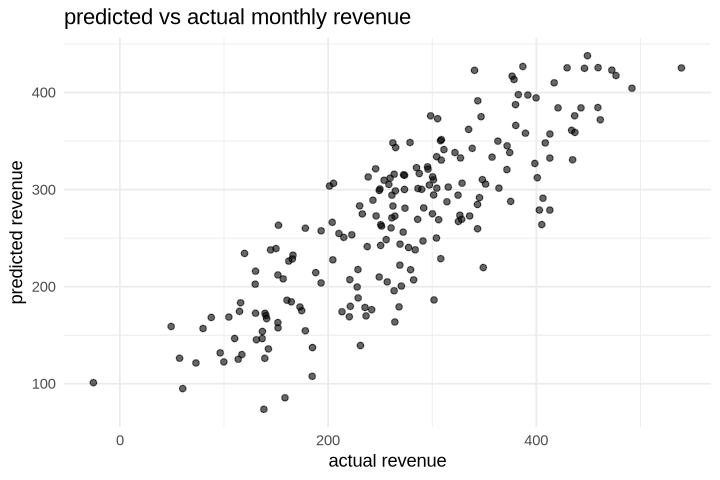

In [13]:
# plot predicted vs actual revenue
plot_df <- tibble(
  Actual = y_test,
  Predicted = as.vector(predictions)
)

ggplot(plot_df, aes(x = Actual, y = Predicted)) +
  geom_point(alpha = 0.6) +
  labs(
    title = "predicted vs actual monthly revenue",
    x = "actual revenue",
    y = "predicted revenue"
  ) +
  theme_minimal()

## Discussion

Discussion...

### References

References...